In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv("train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test=pd.read_csv("test.csv")

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
Id=test['PassengerId'].values

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
len(train)
len(test)

418

In [10]:
train.drop(columns=['Name','PassengerId'],inplace=True)
test.drop(columns=['Name','PassengerId'],inplace=True)

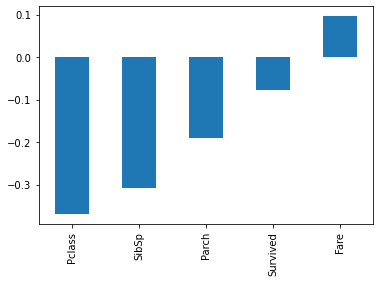

In [11]:
pd.DataFrame(train.corr().sort_values(['Age']))['Age'].drop('Age').plot(kind='bar')

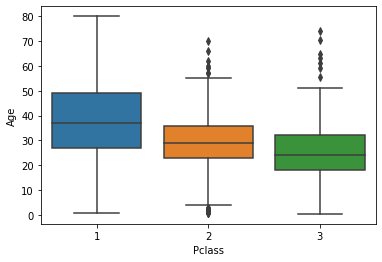

In [12]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [13]:
fillage=train.groupby('Pclass').mean()['Age']
fillage

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [14]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [15]:
def fill_age(col1,col2):
    if pd.isnull(col2):
        return fillage[col1]
    else:
        return col2

In [16]:
train['Age']=train.apply(lambda x: fill_age(x['Pclass'],x['Age']),axis=1)
test['Age']=test.apply(lambda x: fill_age(x['Pclass'],x['Age']),axis=1)

In [17]:
train['Age']

0      22.00000
1      38.00000
2      26.00000
3      35.00000
4      35.00000
         ...   
886    27.00000
887    19.00000
888    25.14062
889    26.00000
890    32.00000
Name: Age, Length: 891, dtype: float64

In [18]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
train['Relatives']=train['SibSp']+-train['Parch']
test['Relatives']=test['SibSp']+test['Parch']

In [20]:
train.drop(columns=['SibSp','Parch'],inplace=True)
test.drop(columns=['SibSp','Parch'],inplace=True)

In [21]:
train.drop(columns=['Ticket','Cabin'],inplace=True)
test.drop(columns=['Ticket','Cabin'],inplace=True)

In [22]:
train.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age          0
Fare         0
Embarked     2
Relatives    0
dtype: int64

In [23]:
train.dropna(inplace=True)

In [24]:
train.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age          0
Fare         0
Embarked     0
Relatives    0
dtype: int64

In [25]:
train_dummies=pd.get_dummies(train[['Sex','Embarked']],drop_first=True)
test_dummies=pd.get_dummies(test[['Sex','Embarked']],drop_first=True)

In [26]:
train=pd.concat([train,train_dummies],axis=1)
test=pd.concat([test,test_dummies],axis=1)

In [27]:
train.drop(columns=['Sex','Embarked'],inplace=True)
test.drop(columns=['Sex','Embarked'],inplace=True)

In [28]:
train.isnull().sum()

Survived      0
Pclass        0
Age           0
Fare          0
Relatives     0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [29]:
test.isnull().sum()

Pclass        0
Age           0
Fare          1
Relatives     0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [30]:
test['Fare']=test['Fare'].replace(np.nan,test['Fare'].median())

In [31]:
X=train.drop(columns='Survived').values
Y=train['Survived']

# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [33]:
model_rfc=RandomForestClassifier(n_estimators=300)

In [34]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [35]:
model_rfc.fit(X_train,Y_train)
Y_predicted_rfc=model_rfc.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix,classification_report

In [37]:
print(confusion_matrix(Y_test,Y_predicted_rfc))
print(classification_report(Y_test,Y_predicted_rfc))

[[48  9]
 [ 6 26]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86        57
           1       0.74      0.81      0.78        32

    accuracy                           0.83        89
   macro avg       0.82      0.83      0.82        89
weighted avg       0.84      0.83      0.83        89



# Support Vector Classifier

In [38]:
from sklearn.svm import SVC

In [39]:
model_svc=SVC()
model_svc.fit(X_train,Y_train)
Y_predicted_svc=model_svc.predict(X_test)

In [40]:
print(confusion_matrix(Y_test,Y_predicted_svc))
print(classification_report(Y_test,Y_predicted_svc))

[[54  3]
 [23  9]]
              precision    recall  f1-score   support

           0       0.70      0.95      0.81        57
           1       0.75      0.28      0.41        32

    accuracy                           0.71        89
   macro avg       0.73      0.61      0.61        89
weighted avg       0.72      0.71      0.66        89



# ANN

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [42]:
model_nn=Sequential()
model_nn.add(Dense(16,activation='relu'))
model_nn.add(Dense(8,activation='relu'))
model_nn.add(Dense(4,activation='relu'))
model_nn.add(Dense(1,activation='sigmoid'))
model_nn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [43]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=20)

In [44]:
model_nn.fit(x=X_train,y=Y_train.values,epochs=100,validation_split=0.2,callbacks=[early_stop])

Train on 640 samples, validate on 160 samples
Epoch 1/100
640/640 [==============================] - 1s 888us/sample - loss: 0.6873 - accuracy: 0.6187 - val_loss: 0.6710 - val_accuracy: 0.6938
Epoch 2/100
640/640 [==============================] - 0s 64us/sample - loss: 0.6846 - accuracy: 0.6547 - val_loss: 0.6682 - val_accuracy: 0.7688
Epoch 3/100
640/640 [==============================] - 0s 57us/sample - loss: 0.6825 - accuracy: 0.6594 - val_loss: 0.6660 - val_accuracy: 0.7500
Epoch 4/100
640/640 [==============================] - 0s 58us/sample - loss: 0.6801 - accuracy: 0.6625 - val_loss: 0.6626 - val_accuracy: 0.7563
Epoch 5/100
640/640 [==============================] - 0s 58us/sample - loss: 0.6787 - accuracy: 0.6562 - val_loss: 0.6606 - val_accuracy: 0.7312
Epoch 6/100
640/640 [==============================] - 0s 51us/sample - loss: 0.6760 - accuracy: 0.6547 - val_loss: 0.6574 - val_accuracy: 0.7312
Epoch 7/100
640/640 [==============================] - 0s 60us/sample - loss:

640/640 [==============================] - 0s 50us/sample - loss: 0.5061 - accuracy: 0.7922 - val_loss: 0.4465 - val_accuracy: 0.8062
Epoch 57/100
640/640 [==============================] - 0s 50us/sample - loss: 0.5130 - accuracy: 0.7594 - val_loss: 0.4546 - val_accuracy: 0.8250
Epoch 58/100
640/640 [==============================] - 0s 47us/sample - loss: 0.5102 - accuracy: 0.7766 - val_loss: 0.4421 - val_accuracy: 0.8125
Epoch 59/100
640/640 [==============================] - 0s 52us/sample - loss: 0.5069 - accuracy: 0.7766 - val_loss: 0.4408 - val_accuracy: 0.8313
Epoch 60/100
640/640 [==============================] - 0s 49us/sample - loss: 0.5042 - accuracy: 0.7703 - val_loss: 0.4711 - val_accuracy: 0.7875
Epoch 61/100
640/640 [==============================] - 0s 50us/sample - loss: 0.4936 - accuracy: 0.7828 - val_loss: 0.4392 - val_accuracy: 0.8000
Epoch 62/100
640/640 [==============================] - 0s 50us/sample - loss: 0.4981 - accuracy: 0.7781 - val_loss: 0.4381 - val_a

In [45]:
Y_predicted_nn=model_nn.predict_classes(X_test)
print(confusion_matrix(Y_test,Y_predicted_nn))
print(classification_report(Y_test,Y_predicted_nn))

[[48  9]
 [ 7 25]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.86        57
           1       0.74      0.78      0.76        32

    accuracy                           0.82        89
   macro avg       0.80      0.81      0.81        89
weighted avg       0.82      0.82      0.82        89



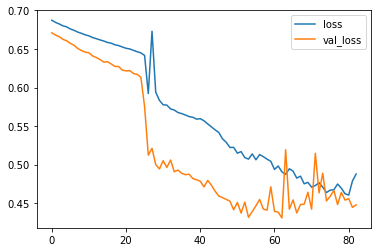

In [46]:
losses=pd.DataFrame(model_nn.history.history)
losses[['loss','val_loss']].plot()

In [50]:
test_prediction=model_rfc.predict(test.values)

In [51]:
submission = pd.DataFrame({
        "PassengerId": Id,
        "Survived": test_prediction.reshape(-1,)
    })
submission.to_csv(r"E:\Kaggle\titanic\result.csv",index=False,)